# **Proyecto III**

**Daniel Bernal**

El proyecto tiene tres secciones, en la primera se evalua una serie de tiempo, en la segunda, un modelo predictivo de las acciones de una compañia basandose en las del año anterior y por ultimo, la tercera, donde se convierte el modelo a uno de clasificacion.

# **Parte 1**

**Intencion:**

La intención de esta primera parte es evaluar la capacidad predictiva de una serie temporal de datos de contaminación ambiental, específicamente los niveles de PM2.5, mediante el planteamiento de pasos y preguntas clave para determinar su comportamiento y desarrollar modelos que permitan realizar predicciones confiables. Este análisis se sustenta en la identificación de patrones y estructuras inherentes a la serie, explorando su estacionariedad, estacionalidad y posibles relaciones con modelos estadísticos.

**Enfoque:**

A partir de las características de la serie, se llevará a cabo un enfoque que incluye el análisis exploratorio inicial, la construcción de modelos predictivos como ARIMA, y la comparación de su rendimiento frente a métodos más básicos como el modelo de persistencia. Además, se evaluará la precisión y robustez de los modelos utilizando métricas como RMSE para establecer conclusiones fundamentadas sobre su capacidad de generalización y su idoneidad para predecir futuros niveles de contaminación. Este proceso permitirá no solo identificar limitaciones en los enfoques tradicionales, sino también proponer posibles alternativas que puedan mejorar las predicciones, como el uso de métodos avanzados de aprendizaje automático.

**Metodologia:**

Lo quese busca en esta primera parte del proyecto es no solo obtener un modelo funcional, sino también aportar una comprensión más profunda de los desafíos y oportunidades en el uso de series temporales para la predicción de fenómenos ambientales, sentando las bases para futuras investigaciones y aplicaciones en el monitoreo de la calidad del aire.

Usando el dataset de serie de tiempo de PM2.5:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

##### Dividir en train y test

In [ ]:
Df = pd.read_csv('/content/pm2.5.csv')
Df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


**Expicacion de las variables**

**No:** Es el número de registro o índice del dataset. Es un identificador único para cada fila.

**year:** El año en que se tomaron los datos. Es una variable numérica que indica el año específico.

**month:** El mes en que se tomaron los datos. Es una variable numérica que va del 1 al 12, representando los meses de enero a diciembre.

**day:** El día del mes en que se tomaron los datos. Es una variable numérica que va del 1 al 31, dependiendo del mes.

**hour:** La hora en que se tomaron los datos. Es una variable numérica que va de 0 a 23, representando las horas del día en formato de 24 horas.

**pm2.5:** La concentración de partículas finas en el aire con un diámetro de menos de 2.5 micrómetros, medida en microgramos por metro cúbico (µg/m³). Es una medida de la calidad del aire, donde valores más altos indican mayor contaminación.

**DEWP:** Punto de rocío (Dew Point), medido en grados Celsius (°C). Es la temperatura a la que el aire debe enfriarse para que se forme condensación (rocío).

**TEMP:** Temperatura del aire, medida en grados Celsius (°C).

**PRES:** Presión atmosférica, medida en hectopascales (hPa).

**cbwd:** Dirección del viento en la estación de medición, codificada de manera categórica. Por ejemplo, puede incluir valores como:

**cv:** viento calma (calm/variable)
NNE: viento del norte-noreste
NE: viento del noreste
ENE: viento del este-noreste, etc.
Iws: Velocidad acumulada del viento (Cumulative Wind Speed), medida en metros por segundo (m/s). Es la suma de la velocidad del viento durante un período específico.

**Is:** Horas de insolaridad (Cumulative Hours of Sunshine). Es la suma de las horas de sol recibidas en un período específico.

**Ir:** Precipitación acumulada (Cumulative Precipitation), medida en milímetros (mm). Es la suma de la precipitación durante un período específico.

In [ ]:
#Se mezclan las columnas para crear un indice de tiempo

Df['date'] = pd.to_datetime(Df[['year', 'month', 'day', 'hour']].assign(hour=Df.hour))
Df.set_index('date', inplace=True)
Df.drop(columns=['year', 'month', 'day', 'hour','No'], inplace=True)

#Se analiza la razon de los Nan en la serie de tiempo y se toma la decision de reemplazarlos con 0

Df = Df.fillna(0)
Df

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [ ]:
# La fecha que represente el 70% de date para poder darle mas datos a train

date_70 = Df.index[int(len(Df.index) * 0.7)]
print(date_70)


2013-07-02 04:00:00


In [ ]:
ts = Df['pm2.5']

train = ts[:'2013-07-02 04:00:00']
test = ts['2013-07-02 04:00:00':]

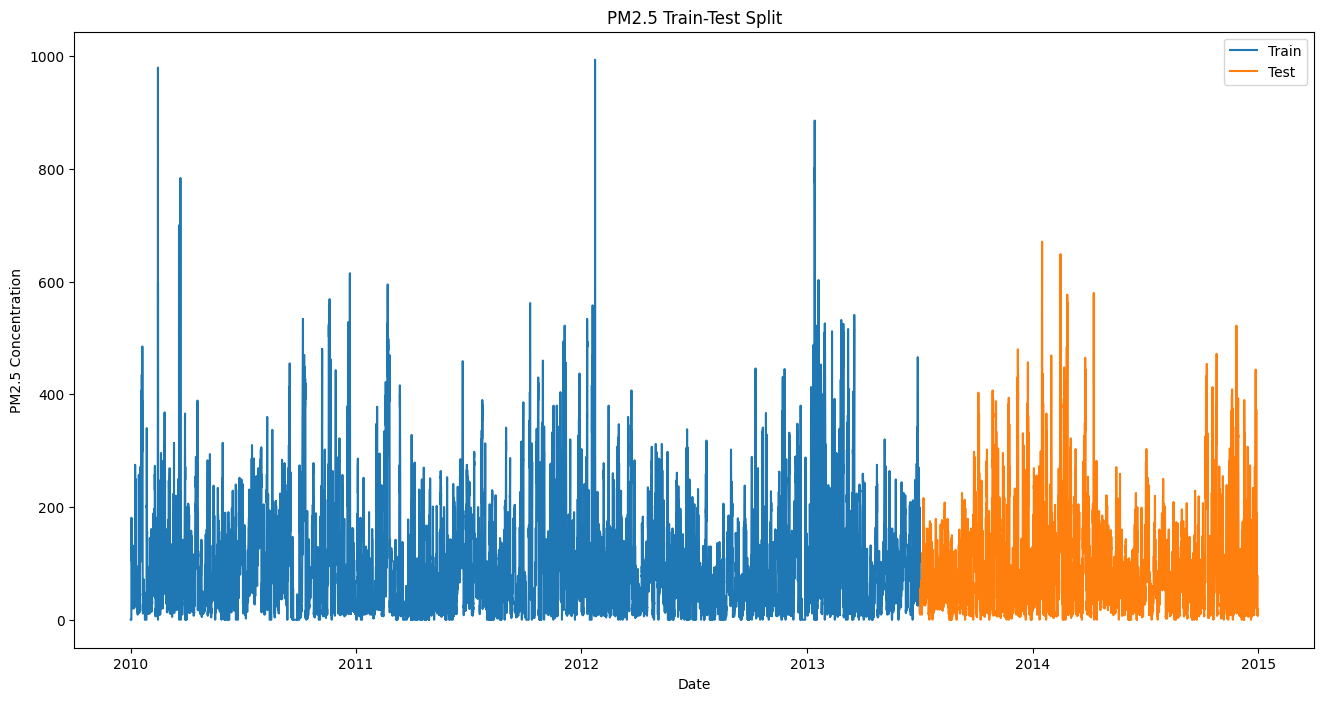

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('PM2.5 Train-Test Split')
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.show()


##### Realizar un análisis exploratorio. Determinar si hay tendencia o seasonality.

In [ ]:
#Con el valor del coeficiente de Pearson podemos determinar que es estacionaria por lo tanto no hay una tendencia a largo plazo
#A pesar de que exite seasonallity en un nivel especifico como lo es la repeticion de cada mes

result = adfuller(ts)
print('Estadístico ADF:', result[0])
print('Valor P:', result[1])
print('Valores Críticos:', result[4])

Estadístico ADF: -21.004273592442072
Valor P: 0.0
Valores Críticos: {'1%': -3.4304994170070295, '5%': -2.861606039041269, '10%': -2.5668051504336344}


In [ ]:
#Cuantos datos hay en un mes

print(len(Df['2010-01':'2010-02']))


1416


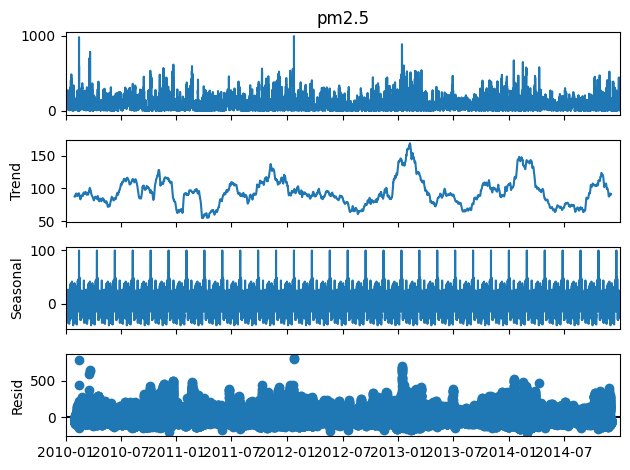

In [ ]:
result = seasonal_decompose(ts, model='additive', period=1416)
result.plot()
plt.show()

##### Determinar si la serie es estacionaria

<Axes: xlabel='date'>

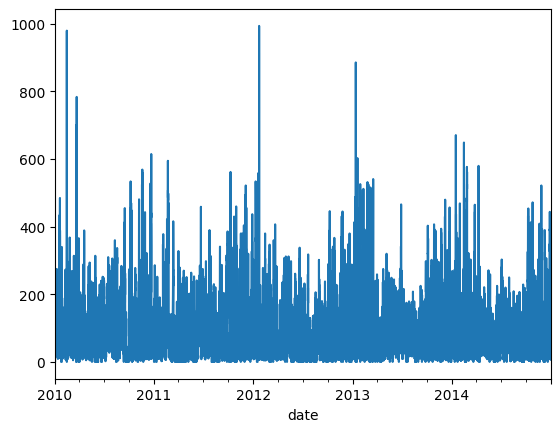

In [ ]:
#Es estacionaria como se demostro en el punto anterior utilizando el coeficiente de Pearson, se evalua si es mayor o menor
#a 0.05, como obtuvimos el valor de 0.0, se puede determinar con seguridad

ts.plot()

##### Determinar si es un Random Walk

In [ ]:
#No es y se puede demostrar con el anterior punto con el coeficiente de pearson y ADF, al rechazar la hipotesis nula
#podemos decir que no es random walk.
#Por lo tanto se puede determinar que la serie tiene ciertos patrones, tendencias o estructuras que permiten predecir
#futuros valores basados en valores pasados.

##### Construir un modelo ARIMA

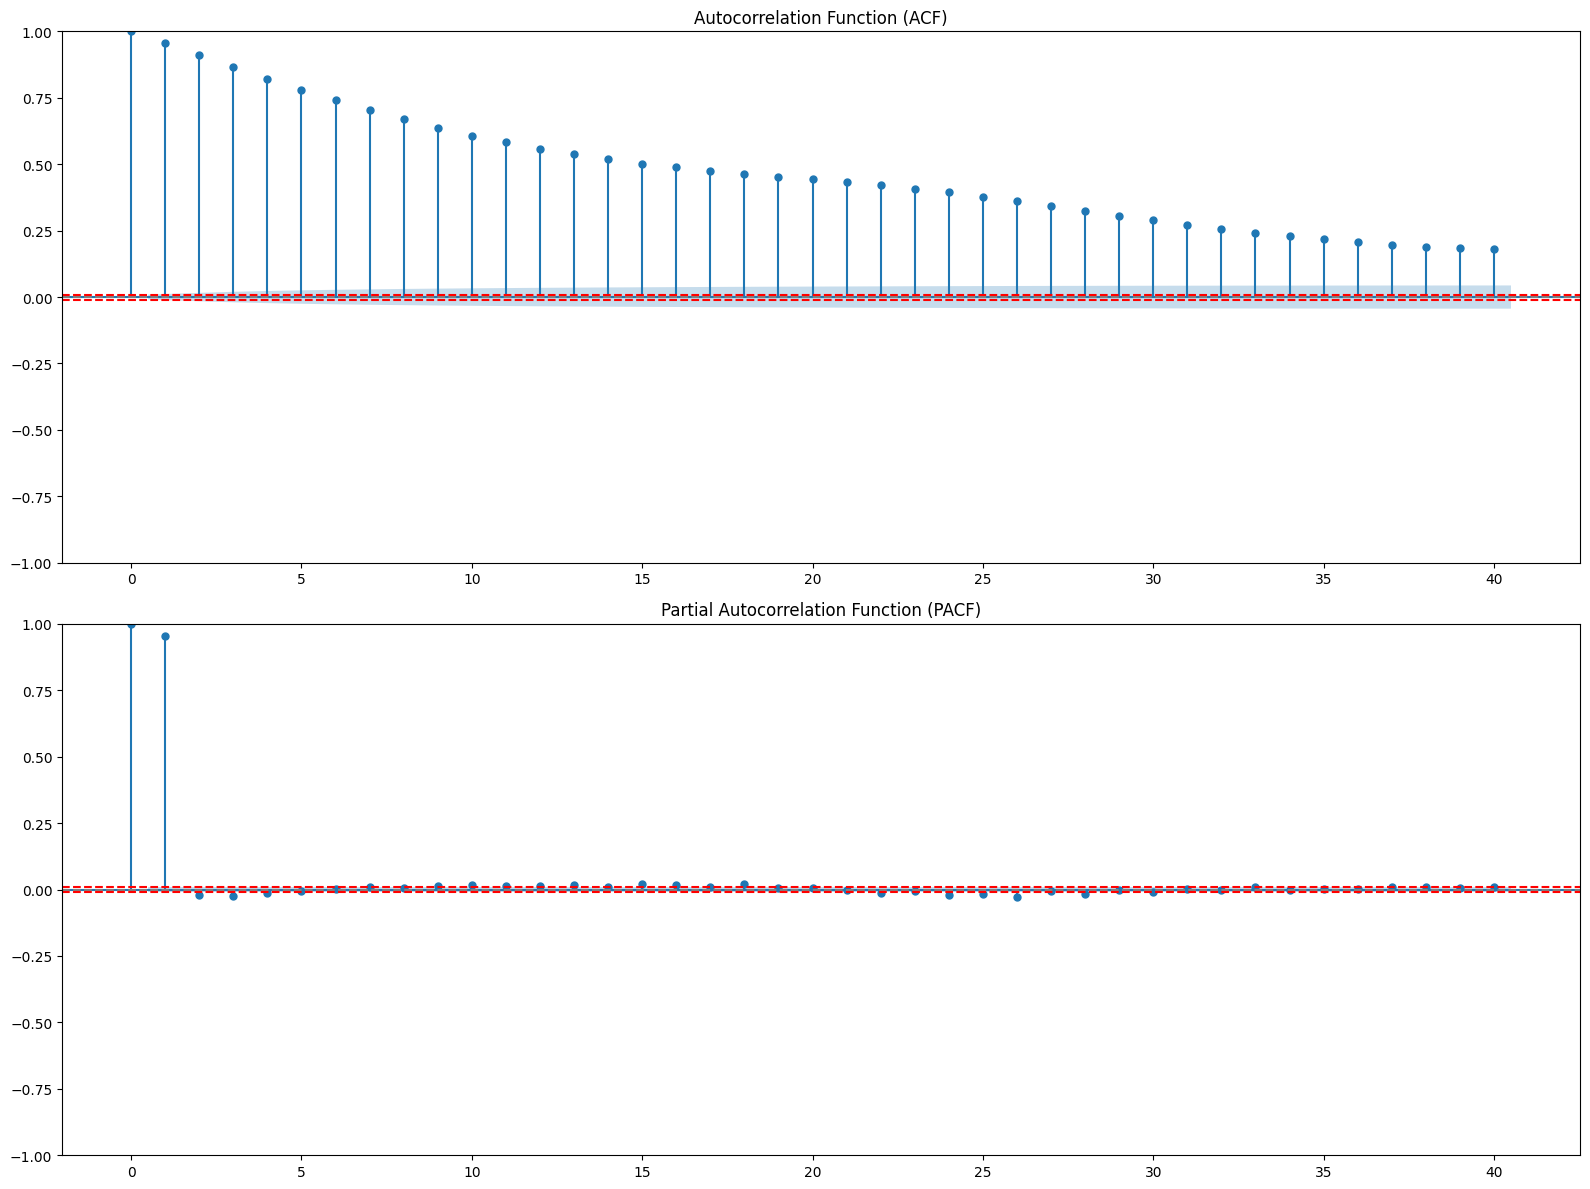

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot the ACF
plot_acf(ts, ax=axes[0], lags=40)
axes[0].axhline(y=0, color='gray', linestyle='dashed')
axes[0].axhline(y=1.96/np.sqrt(len(ts)), color='red', linestyle='dashed')
axes[0].axhline(y=-1.96/np.sqrt(len(ts)), color='red', linestyle='dashed')
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot the PACF
plot_pacf(ts, ax=axes[1], lags=40)
axes[1].axhline(y=0, color='gray', linestyle='dashed')
axes[1].axhline(y=1.96/np.sqrt(len(ts)), color='red', linestyle='dashed')
axes[1].axhline(y=-1.96/np.sqrt(len(ts)), color='red', linestyle='dashed')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
#ACF son los valores del ultimo parametro
model = ARIMA(ts, order=(5, 0, 15))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  pm2.5   No. Observations:                43824
Model:                ARIMA(5, 0, 15)   Log Likelihood             -206842.778
Date:                Thu, 30 May 2024   AIC                         413729.555
Time:                        16:43:30   BIC                         413920.690
Sample:                    01-01-2010   HQIC                        413789.796
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.9599      4.435     21.186      0.000      85.267     102.652
ar.L1          1.1655      0.058     20.246      0.000       1.053       1.278
ar.L2          1.2480      0.115     10.813      0.0

##### Evaluar con RMSE en train y test

In [ ]:
# Train RMSE
train_predict = model_fit.predict(start=train.index[0], end=train.index[-1])
train_rmse = np.sqrt(mean_squared_error(train, train_predict))
print('Train RMSE:', train_rmse)

# Test RMSE
test_predict = model_fit.predict(start=test.index[0], end=test.index[-1])
test_rmse = np.sqrt(mean_squared_error(test, test_predict))
print('Test RMSE:', test_rmse)


Train RMSE: 28.56505929718907
Test RMSE: 23.47504607718937


##### Comparar con un modelo de persistencia

In [ ]:
train_X, train_y = train[:-1], train[1:]
test_X, test_y = test[:-1], test[1:]

# Predicción de los valores de entrenamiento y prueba
train_pred = train_X
test_pred = test_X

# Calcular el RMSE en train y test
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))

print("RMSE en Train:", train_rmse)
print("RMSE en Test:", test_rmse)

RMSE en Train: 29.011570256753608
RMSE en Test: 23.85933397547173


##### Realizar un análisis final de la seccion

La serie de tiempo PM2.5 demuestra patrones recurrentes que permiten su uso como base para un modelo predictivo. En particular, la estacionariedad de la serie, validada mediante el estadístico ADF y el coeficiente de Pearson, junto con la presencia de estacionalidad mensual, sugiere que es posible identificar tendencias y comportamientos futuros basados en los valores históricos. Además, al rechazar la hipótesis nula en la prueba ADF, se descarta que la serie sea un random walk, lo que refuerza la idea de que contiene estructuras y regularidades útiles para la predicción.

Sin embargo, los resultados obtenidos con el modelo ARIMA muestran que su desempeño no es significativamente superior al modelo de persistencia. Aunque el RMSE en el conjunto de prueba (23.475) es ligeramente mejor que el del modelo de persistencia (23.859), la diferencia no es sustancial. Esto sugiere que el modelo ARIMA, a pesar de capturar parte de la estructura subyacente de la serie, podría no ser el más adecuado para esta tarea. Una posible explicación radica en la complejidad y el ajuste de los parámetros del modelo, como se observa en el orden seleccionado para ARIMA (5, 0, 15).

Para mejorar las predicciones, sería recomendable explorar modelos alternativos que puedan captar mejor la estacionalidad y otros patrones inherentes a la serie. Por ejemplo, métodos basados en aprendizaje automático, como redes neuronales recurrentes (RNNs) o modelos híbridos que combinen técnicas tradicionales con enfoques modernos, podrían ofrecer una mayor precisión. Además, sería útil realizar una optimización más exhaustiva de los hiperparámetros de ARIMA o explorar variaciones como SARIMA, que podría manejar mejor la estacionalidad detectada. En conclusión, aunque la serie tiene potencial para la predicción, los resultados actuales destacan la necesidad de buscar enfoques más robustos para mejorar la calidad de las predicciones.

#**Parte 2**

**Intencion:**

La siguiente parte del proyecto tiene la intención de evaluar el comportamiento y las tendencias de una serie temporal financiera mediante un análisis detallado de autocorrelaciones y la implementación de modelos predictivos. Para ello, se plantea un enfoque que incluye el estudio de los gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF) como herramientas clave para identificar patrones y relaciones entre los datos.

**Enfoque:**

Se quiere realizar lo anterior a traves de la construcción de un modelo ARIMA ajustado a las características específicas de la serie, evaluando el impacto de los parámetros en el rendimiento del modelo y priorizando configuraciones que minimicen el error de predicción. Este modelo será contrastado con enfoques alternativos como la persistencia y el promedio móvil, evaluando su efectividad mediante métricas como el RMSE.

**Metodologia:**

Incorporar una estrategia de validación a través de rolling forecasting, tanto con un modelo fijo como con un modelo reentrenado periódicamente, y se realiza un análisis retrospectivo para los años 2017 y 2018. Este enfoque busca proporcionar una visión integral y fundamentada sobre la capacidad predictiva de los modelos analizados en un contexto real.

Crear un modelo de predicción para el precio de las acciones de Apple. Utilizar los datos del último año para la creación del modelo.  (15 puntos)

##### Realizar un análisis de auto correlaciones. ¿Existen correlaciones?(Revisar gráficos ACF y PCAF)

https://es.finance.yahoo.com/quote/AAPL/history

<Axes: xlabel='Date'>

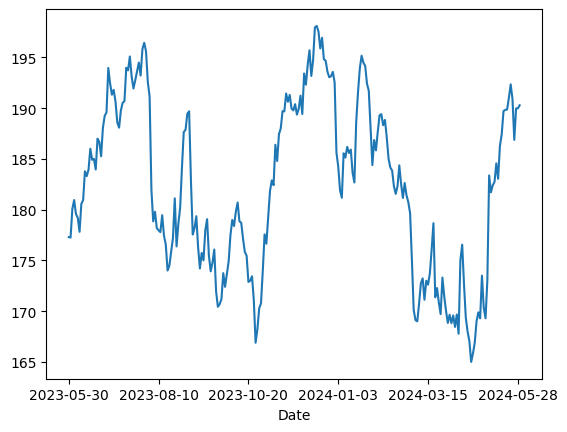

In [ ]:
DfII = pd.read_csv('/content/AAPL.csv', index_col= 0)
ts = DfII['Close']
ts.plot()

In [ ]:
date_70 = DfII.index[int(len(DfII.index) * 0.7)]
print(date_70)

2024-02-09


In [ ]:
train = ts[:'2024-02-08']
test = ts['2024-02-08':]

In [ ]:
result = adfuller(ts)
print('Estadístico ADF:', result[0])
print('Valor P:', result[1])
print('Valores Críticos:', result[4])

Estadístico ADF: -2.3656299075692524
Valor P: 0.15167296501832833
Valores Críticos: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}


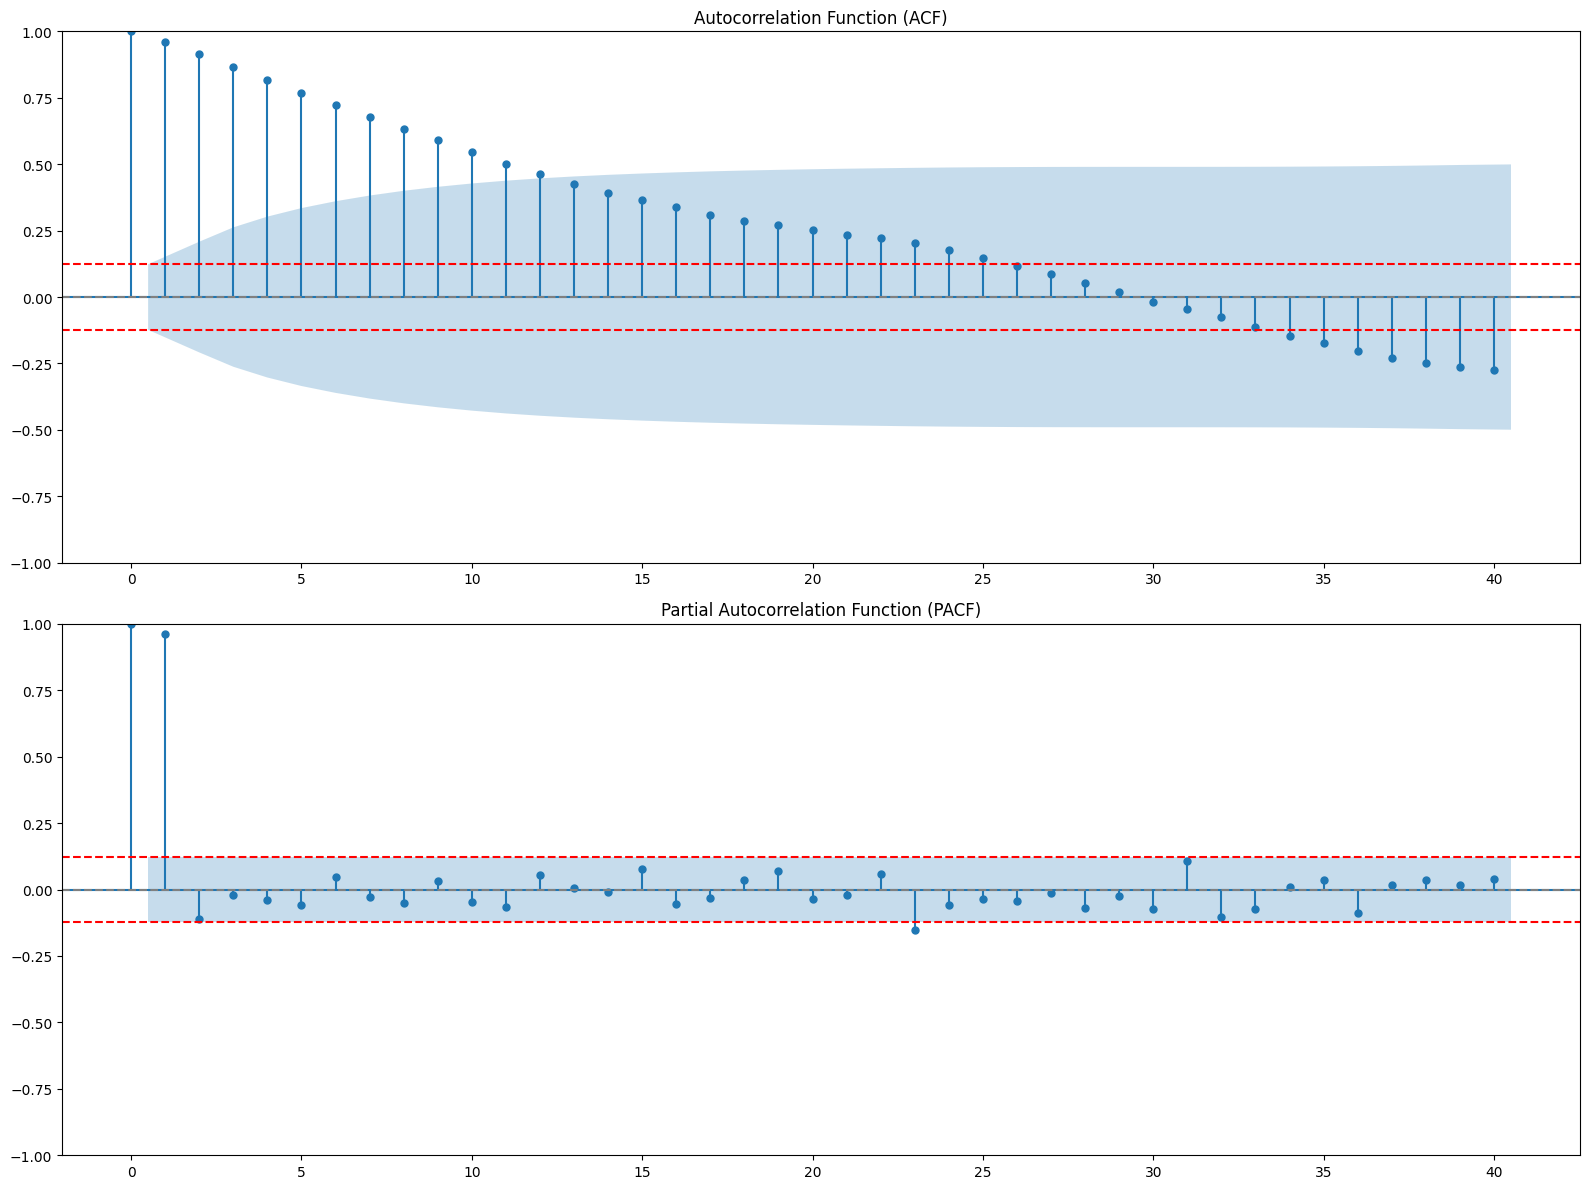

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot the ACF
plot_acf(ts, ax=axes[0], lags=40)
axes[0].axhline(y=0, color='gray', linestyle='dashed')
axes[0].axhline(y=1.96/np.sqrt(len(ts)), color='red', linestyle='dashed')
axes[0].axhline(y=-1.96/np.sqrt(len(ts)), color='red', linestyle='dashed')
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot the PACF
plot_pacf(ts, ax=axes[1], lags=40)
axes[1].axhline(y=0, color='gray', linestyle='dashed')
axes[1].axhline(y=1.96/np.sqrt(len(ts)), color='red', linestyle='dashed')
axes[1].axhline(y=-1.96/np.sqrt(len(ts)), color='red', linestyle='dashed')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

##### Proponer un modelo de ARIMA

In [ ]:
#A pesar del resultado obtenido con ADFy el coeficiente de Pearson se decide no ajustar las diferencias del parametro de ARIMA
#ya que al aumentar este valor, el error aumenta.
#lo mismo ocurre con los demas parametros de los lags, se toma un valor aproximado de los valores que se pueden identificar en
#los graficos ACF y PACF

model = ARIMA(ts, order=(2, 0, 12))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                ARIMA(2, 0, 12)   Log Likelihood                -561.394
Date:                Thu, 30 May 2024   AIC                           1154.787
Time:                        16:43:37   BIC                           1211.258
Sample:                             0   HQIC                          1177.510
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.4578      3.066     59.513      0.000     176.449     188.467
ar.L1          1.5648      1.387      1.128      0.259      -1.154       4.284
ar.L2         -0.5920      1.262     -0.469      0.6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Train RMSE
train_predict = model_fit.predict(start=train.index[0], end=train.index[-1])
train_rmse = np.sqrt(mean_squared_error(train, train_predict))
print('Train RMSE:', train_rmse)

# Test RMSE
test_predict = model_fit.predict(start=test.index[0], end=test.index[-1])
test_rmse = np.sqrt(mean_squared_error(test, test_predict))
print('Test RMSE:', test_rmse)

Train RMSE: 2.135488373562322
Test RMSE: 2.4931876042994654


In [ ]:
train_X, train_y = train[:-1], train[1:]
test_X, test_y = test[:-1], test[1:]

# Predicción de los valores de entrenamiento y prueba
train_pred = train_X
test_pred = test_X

# Calcular el RMSE en train y test
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))

print("RMSE en Train:", train_rmse)
print("RMSE en Test:", test_rmse)

RMSE en Train: 2.193444938235589
RMSE en Test: 2.538977675849346


##### Evaluar el modelo usando rolling forcasting(Realizar dos versiones, una con el modelo fijo y la otra reentrando en cada predicción usando los últimos 20 dias).

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=779.089, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=775.400, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=774.180, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=774.425, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=773.544, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=775.724, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.500 seconds
RMSE del modelo fijo: 2.549
[188.320007, 188.320007, 188.850006, 187.149994, 185.039993, 184.149994, 183.860001, 182.309998, 181.559998, 182.320007, 184.369995, 182.520004, 181.160004, 182.630005, 181.419998, 180.75, 179.68455182018906, 174.7423482386538, 169.76323485266062, 169.52782495166903, 169.56438607990017, 171.5948429259262, 173.60653896971567, 173.76091084345285, 171.2261748707021, 173.782658557589, 172.98520984888893, 174.31620025562302, 176.82722830667615, 179.36908740793945

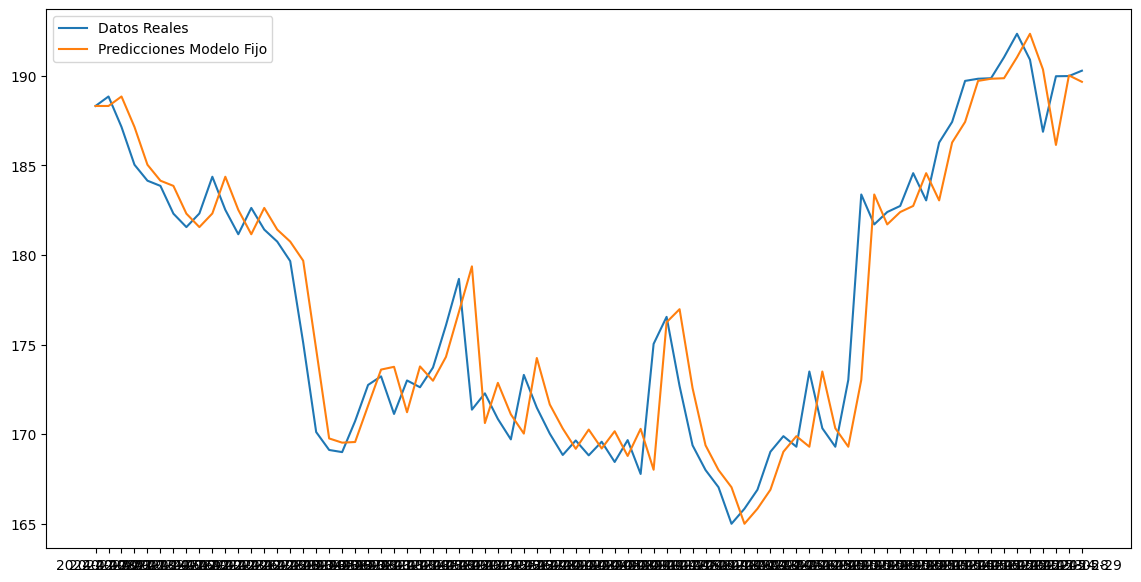

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
#Modelo fijo

train_list = train.tolist()
test_list = test.tolist()

# Modelo fijo
model = auto_arima(train_list, seasonal=False, trace=True)
predictions = []
history = train_list.copy()

for t in range(len(test_list)):
    yhat = model.predict(n_periods=1)[0]
    predictions.append(yhat)
    history.append(test_list[t])
    model = auto_arima(history, seasonal=False, trace=False)

error = mean_squared_error(test_list, predictions)
print('RMSE del modelo fijo: %.3f' % np.sqrt(error))
print(predictions)

plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Datos Reales')
plt.plot(test.index, predictions, label='Predicciones Modelo Fijo')
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.433, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=103.566, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=105.560, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=94.199, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=98.558, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=94.838, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=96.071, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=96.088, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=113.095, Time=0.01 sec
 ARIMA(0,0,

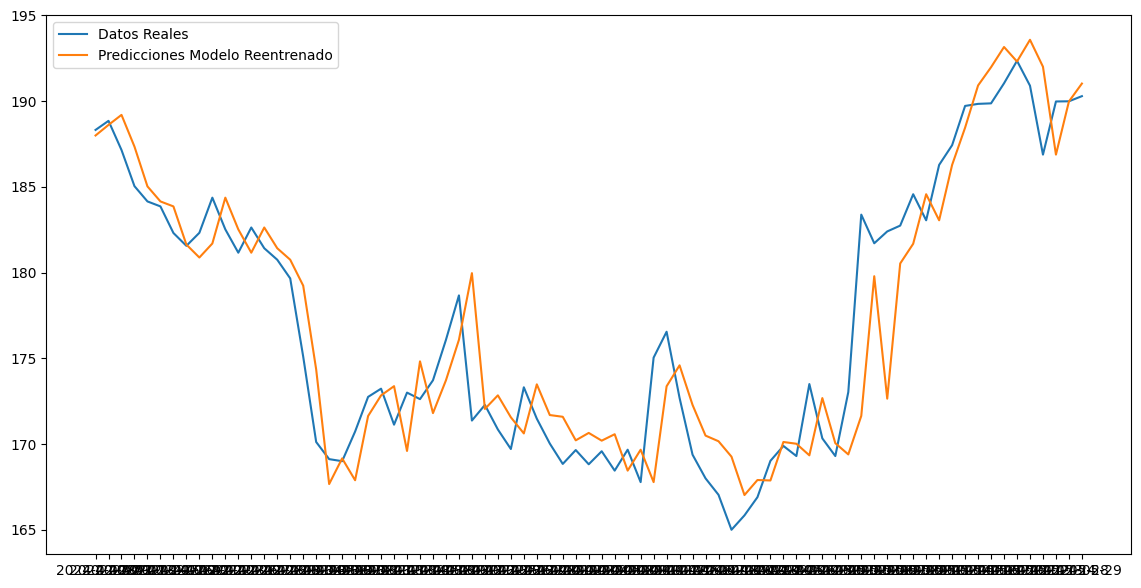

In [ ]:
#Modelo reetrenado
window_size = 20

# Inicializar historial y predicciones
history = train.tolist()
predictions = []

for t in range(len(test)):
    if len(history) > window_size:
        history = history[-window_size:]
    # Ajustar el modelo ARIMA con los datos actuales
    model = auto_arima(history, seasonal=False, trace=True)
    # Hacer predicción
    yhat = model.predict(n_periods=1)[0]
    predictions.append(yhat)
    # Actualizar el historial con el nuevo valor
    history.append(test.iloc[t])

error = mean_squared_error(test, predictions)
print('RMSE del modelo reentrenado: %.3f' % np.sqrt(error))
print(predictions)

# Opcional: Graficar resultados
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Datos Reales')
plt.plot(test.index, predictions, label='Predicciones Modelo Reentrenado')
plt.legend()
plt.show()



##### Comparar con un modelo de persistencia y un modelo de media móvil.

RMSE del modelo de persistencia: 2.522


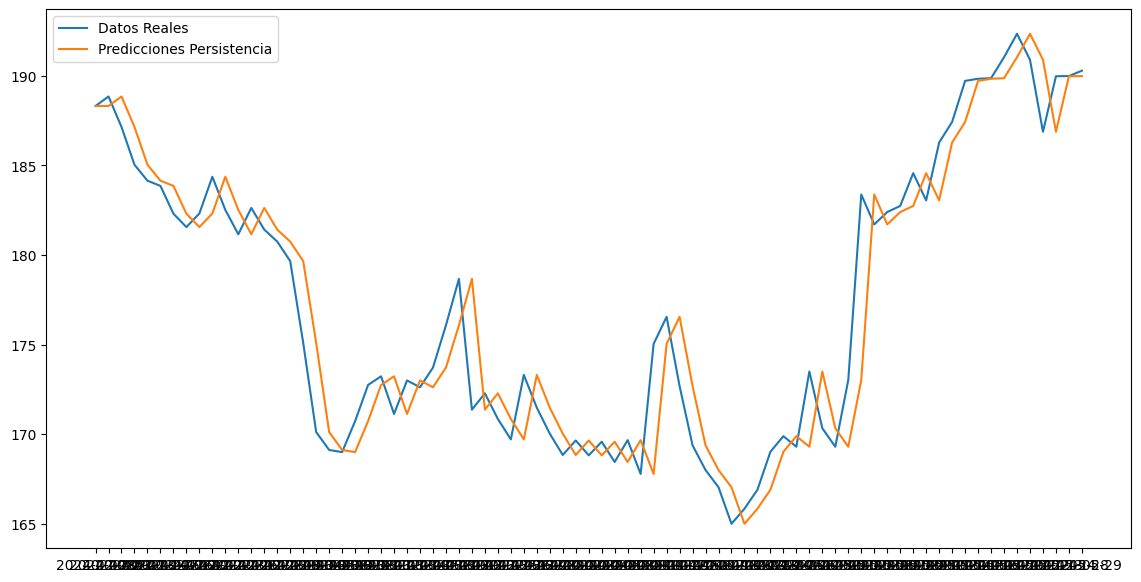

In [ ]:
#Modelo de persistencia

history = train.tolist()
predictions = []
for t in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    history.append(test.iloc[t])

error = mean_squared_error(test, predictions)
print('RMSE del modelo de persistencia: %.3f' % np.sqrt(error))

plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Datos Reales')
plt.plot(test.index, predictions, label='Predicciones Persistencia')
plt.legend()
plt.show()


RMSE del modelo de media móvil: 7.072


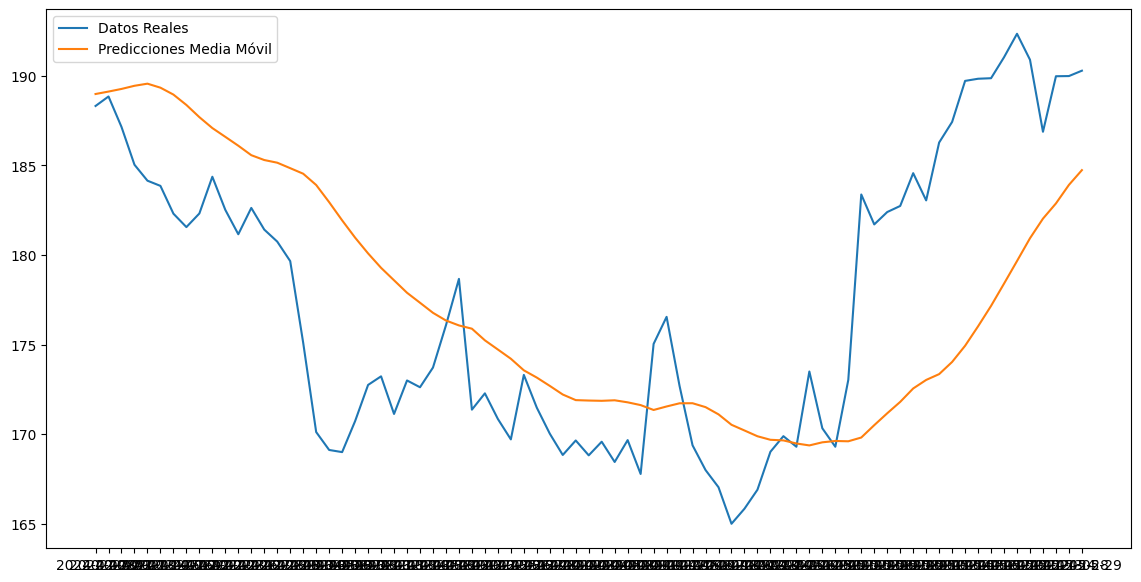

In [ ]:
#Modelo media movil

window_size = 20

history = train.tolist()
predictions = []
for t in range(len(test)):
    yhat = np.mean(history[-window_size:])
    predictions.append(yhat)
    history.append(test.iloc[t])

error = mean_squared_error(test, predictions)
print('RMSE del modelo de media móvil: %.3f' % np.sqrt(error))

plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Datos Reales')
plt.plot(test.index, predictions, label='Predicciones Media Móvil')
plt.legend()
plt.show()

##### Realizar backtesting con los años 2017 y 2018

In [ ]:
#Datos del 2017

Df2017 = pd.read_csv('/content/AAPL (2017).csv', index_col= 0)
ts2017 = Df2017['Close']

date_70 = Df2017.index[int(len(Df2017.index) * 0.7)]
print(date_70)

2017-09-13


In [ ]:
train = ts2017[:'2017-09-13']
test = ts2017['2017-09-13':]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Train RMSE: 0.6674191140929789
Test RMSE: 0.441466079032313


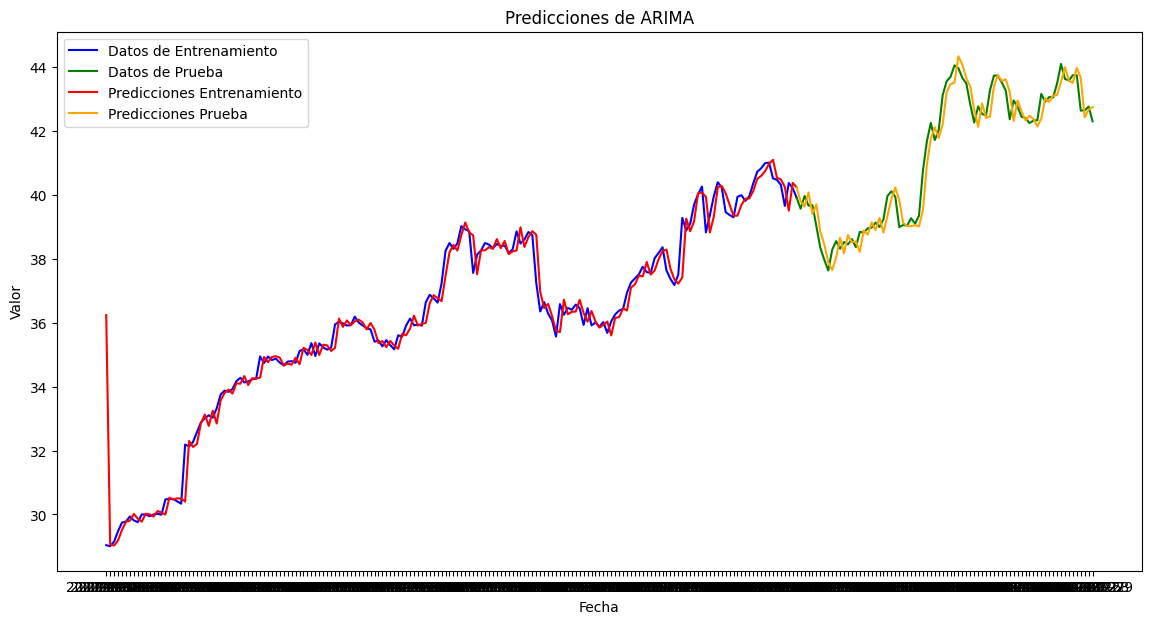

In [ ]:
# Ajustar el modelo ARIMA
model = ARIMA(ts2017, order=(2, 0, 12))
model_fit = model.fit()

# Generar predicciones para datos de entrenamiento y prueba
train_predict = model_fit.predict(start=train.index[0], end=train.index[-1])
test_predict = model_fit.predict(start=test.index[0], end=test.index[-1])

# Calcular RMSE
train_rmse = np.sqrt(mean_squared_error(train, train_predict))
test_rmse = np.sqrt(mean_squared_error(test, test_predict))

# Imprimir RMSE
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

# Graficar datos de entrenamiento, datos de prueba y predicciones
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Datos de Entrenamiento', color='blue')
plt.plot(test.index, test, label='Datos de Prueba', color='green')
plt.plot(train.index, train_predict, label='Predicciones Entrenamiento', color='red')
plt.plot(test.index, test_predict, label='Predicciones Prueba', color='orange')
plt.title('Predicciones de ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [ ]:
#Datos 2018

Df2018 = pd.read_csv('/content/AAPL (2018).csv', index_col= 0)
ts2018 = Df2018['Close']

date_70 = Df2018.index[int(len(Df2018.index) * 0.7)]
print(date_70)

2018-09-12


In [ ]:
train = ts2018[:'2018-09-12']
test = ts2018['2018-09-12':]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Train RMSE: 0.6664637031337989
Test RMSE: 1.1216828314732483


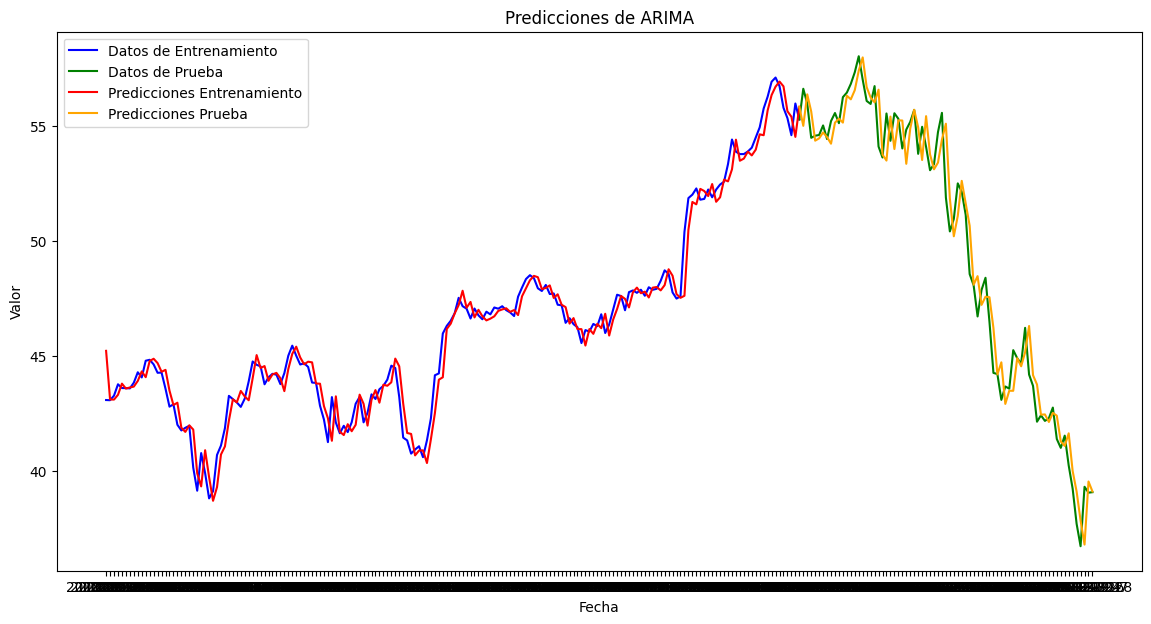

In [ ]:
# Ajustar el modelo ARIMA
model = ARIMA(ts2018, order=(2, 0, 12))
model_fit = model.fit()

# Generar predicciones para datos de entrenamiento y prueba
train_predict = model_fit.predict(start=train.index[0], end=train.index[-1])
test_predict = model_fit.predict(start=test.index[0], end=test.index[-1])

# Calcular RMSE
train_rmse = np.sqrt(mean_squared_error(train, train_predict))
test_rmse = np.sqrt(mean_squared_error(test, test_predict))

# Imprimir RMSE
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

# Graficar datos de entrenamiento, datos de prueba y predicciones
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Datos de Entrenamiento', color='blue')
plt.plot(test.index, test, label='Datos de Prueba', color='green')
plt.plot(train.index, train_predict, label='Predicciones Entrenamiento', color='red')
plt.plot(test.index, test_predict, label='Predicciones Prueba', color='orange')
plt.title('Predicciones de ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

**Analisis:**

El RMSE en los datos de entrenamiento y prueba para el año 2017 muestra un bajo error, con valores de 0.667 y 0.441, respectivamente. Esto indica que el modelo logra capturar adecuadamente el comportamiento de los datos tanto en el entrenamiento como en la prueba.
En 2018, aunque el RMSE en los datos de entrenamiento se mantiene bajo (0.666), el error en los datos de prueba es más alto (1.122), lo que podría indicar que el modelo tiene dificultades para generalizar a los datos de prueba de este año.

En el gráfico correspondiente a 2017, las predicciones para los datos de entrenamiento y prueba están muy alineadas con los valores reales, mostrando una buena capacidad del modelo para seguir la tendencia.
En el gráfico de 2018, aunque las predicciones del modelo siguen la tendencia general de los datos, hay una mayor diferencia en ciertos intervalos, especialmente hacia el final del conjunto de prueba, lo que coincide con el aumento del RMSE.

La diferencia en el RMSE de los datos de prueba entre ambos años puede estar asociada a cambios en la dinámica del mercado o en el comportamiento de la serie temporal que el modelo ARIMA no logró capturar completamente. Esto sugiere que los parámetros del modelo podrían necesitar ajustes o que el modelo podría beneficiarse de técnicas adicionales, como el uso de una estructura de modelo más flexible.

En conclusiones, para resumir lo anterior, modelo ARIMA propuesto es efectivo en capturar tendencias y patrones en los datos de 2017, pero muestra limitaciones al generalizar para los datos de prueba de 2018. Esto destaca la importancia de realizar un análisis más profundo sobre los cambios en los datos y considerar modelos alternativos o ajustes adicionales para mejorar el desempeño predictivo en diferentes contextos.

# **Parte 3**

**Intencion:**

La ultima parte de este proyecto tiene la intención de evaluar la capacidad de transformar un problema de predicción de valores continuos en un problema de clasificación binaria, con el objetivo de predecir si el precio de una acción subirá o bajará. A través de esta conversión, se busca desarrollar modelos predictivos robustos que permitan analizar el comportamiento de las acciones, utilizando técnicas de machine learning para interpretar las tendencias de mercado.

**Enfoque:**

Para lograr lo anterior, se implementan diversas estrategias, como la creación de variables indicadoras basadas en las diferencias sucesivas de precios, el ajuste de hiperparámetros y la validación cruzada de múltiples modelos de clasificación, entre ellos K-Nearest Neighbors, Decision Trees, Random Forest y Logistic Regression. Además, se realiza un análisis comparativo con un modelo de referencia (clasificador aleatorio) para evaluar el desempeño relativo de los modelos entrenados.

**Metodologia:**

Se incluyen métricas clave como precisión, exactitud y recall, acompañadas de un análisis de sesgo y varianza, con el propósito de diagnosticar problemas como sobreajuste o subajuste. Este enfoque integral no solo busca identificar el mejor modelo, sino también generar predicciones confiables y bien ajustadas a nuevos datos.

- Convertir el problema anterior en un problema de clasificación que prediga si la acción va a subir o a bajar. Desarrollar un modelo de predicción para este problema.


<Axes: xlabel='Date'>

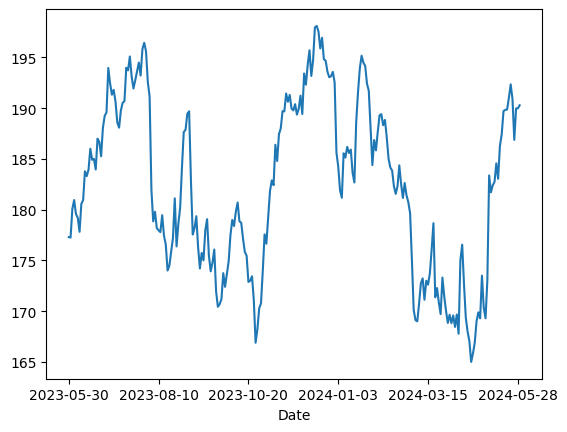

In [ ]:
DfIII = pd.read_csv('/content/AAPL.csv', index_col= 0)
ts = DfIII['Close']
ts.plot()

In [ ]:
# Calcular las diferencias entre los precios de cierre sucesivos
close_diff = DfIII['Close'].diff().dropna()

# Se crea una nueva variable booleana indicando si las acciones subieron (True) o bajaron (False)
close_rise = close_diff > 0

DfIII['CloseRise'] = close_rise

DfIII.dropna(inplace= True)
DfIII

,Open,High,Low,Close,Adj Close,Volume,CloseRise
Date,,,,,,,
2023-05-31,177.330002,179.350006,176.759995,177.250000,176.313644,99625300,False
2023-06-01,177.699997,180.119995,176.929993,180.089996,179.138626,68901800,True
2023-06-02,181.029999,181.779999,179.259995,180.949997,179.994095,61945900,True
2023-06-05,182.630005,184.949997,178.039993,179.580002,178.631332,121946500,False
2023-06-06,179.970001,180.119995,177.429993,179.210007,178.263306,64848400,False
...,...,...,...,...,...,...,...
2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500,False
2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900,False
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600,True


In [ ]:
DfIII.corr()

,Open,High,Low,Close,Adj Close,Volume,CloseRise
Open,1.000000,0.991020,0.990600,0.977208,0.976878,-0.190837,-0.014040
High,0.991020,1.000000,0.991292,0.989773,0.989090,-0.164155,0.044882
Low,0.990600,0.991292,1.000000,0.991823,0.991507,-0.229118,0.060109
Close,0.977208,0.989773,0.991823,1.000000,0.999430,-0.209759,0.115342
Adj Close,0.976878,0.989090,0.991507,0.999430,1.000000,-0.210438,0.115851
Volume,-0.190837,-0.164155,-0.229118,-0.209759,-0.210438,1.000000,-0.128555
CloseRise,-0.014040,0.044882,0.060109,0.115342,0.115851,-0.128555,1.000000


In [ ]:
DfIII.drop(['Open','Volume','High','Low'], axis=1, inplace=True)

In [ ]:
train, test = train_test_split(DfIII, test_size=0.3, random_state=123)

x_train = train[['Close','Adj Close']]
y_train = train['CloseRise'].astype(int)

x_test = test[['Close','Adj Close']]
y_test = test['CloseRise'].astype(int)

In [ ]:
models = {
    'KNN': Pipeline(steps=[('classifier', KNeighborsClassifier())]),
    'DecisionTree': Pipeline(steps=[('classifier', DecisionTreeClassifier())]),
    'RandomForest': Pipeline(steps=[('classifier', RandomForestClassifier())]),
    'LogisticRegression': Pipeline(steps=[('classifier', LogisticRegression())])
}

In [ ]:
param_grids = {
    'KNN': {'classifier__n_neighbors': [3, 5, 7]},
    'DecisionTree': {'classifier__max_depth': [5, 10, 20]},
    'RandomForest': {'classifier__n_estimators': [50, 100, 200],
                     'classifier__max_depth': [5, 10, 20]},
    'LogisticRegression': {'classifier__C': [0.01, 1, 100]}
}

In [ ]:
from sklearn.model_selection import GridSearchCV
best_models = {}
for name, model in models.items():
    grid_search =   GridSearchCV(model, param_grid=param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    best_models[name] = grid_search

In [ ]:
from sklearn.model_selection import cross_val_score
for model_name, result in best_models.items():
    model = result.best_estimator_
    cv_score = cross_val_score(model, x_train, y_train, cv=5).mean()
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    print(f"Modelo: {model_name}")
    print(f"Puntaje de validación cruzada: {cv_score}")
    print(f"Rendimiento en datos de entrenamiento: {train_score}")
    if cv_score < train_score:
        print("El modelo está sobreajustando (overfitting)")
    elif cv_score > train_score:
        print("El modelo está subajustando (underfitting)")
    else:
        print("El modelo está bien ajustado")
    print()

Modelo: KNN
Puntaje de validación cruzada: 0.5085714285714286
Rendimiento en datos de entrenamiento: 0.6514285714285715
El modelo está sobreajustando (overfitting)

Modelo: DecisionTree
Puntaje de validación cruzada: 0.45714285714285713
Rendimiento en datos de entrenamiento: 0.6857142857142857
El modelo está sobreajustando (overfitting)

Modelo: RandomForest
Puntaje de validación cruzada: 0.4457142857142856
Rendimiento en datos de entrenamiento: 0.7828571428571428
El modelo está sobreajustando (overfitting)

Modelo: LogisticRegression
Puntaje de validación cruzada: 0.52
Rendimiento en datos de entrenamiento: 0.5371428571428571
El modelo está sobreajustando (overfitting)



In [ ]:
# Ver los mejores hiperparámetros y puntuaciones de validación cruzada para cada modelo
for name, model in best_models.items():
    print(f"Mejores parametros para {name}: {model.best_params_}")

Mejores parametros para KNN: {'classifier__n_neighbors': 7}
Mejores parametros para DecisionTree: {'classifier__max_depth': 5}
Mejores parametros para RandomForest: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Mejores parametros para LogisticRegression: {'classifier__C': 100}


In [ ]:
# Entrenar los modelos finales con los mejores hiperparámetros en todo el conjunto de entrenamiento
final_models = {name: model.best_estimator_ for name, model in best_models.items()}

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(x_train, y_train)

y_pred_dummy = dummy_clf.predict(x_test)
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy)
recall_dummy = recall_score(y_test, y_pred_dummy)

cv_accuracy_dummy = cross_val_score(dummy_clf, x_train, y_train, cv=5, scoring='accuracy')
cv_precision_dummy = cross_val_score(dummy_clf, x_train, y_train, cv=5, scoring='precision')
cv_recall_dummy = cross_val_score(dummy_clf, x_train, y_train, cv=5, scoring='recall')


bias_dummy = 1 - np.mean(cv_accuracy_dummy)
variance_dummy = np.std(cv_accuracy_dummy)


print("Modelo de Referencia (Clasificación Aleatoria):")
print(f"Accuracy: {accuracy_dummy:.2f} ± {np.std(cv_accuracy_dummy):.2f}")
print(f"Precisión: {precision_dummy:.2f} ± {np.std(cv_precision_dummy):.2f}")
print(f"Recall: {recall_dummy:.2f} ± {np.std(cv_recall_dummy):.2f}")
print(f"Sesgo: {bias_dummy:.2f}")
print(f"Varianza: {variance_dummy:.2f}")

Modelo de Referencia (Clasificación Aleatoria):
Accuracy: 0.53 ± 0.08
Precisión: 0.55 ± 0.05
Recall: 0.53 ± 0.11
Sesgo: 0.47
Varianza: 0.08


In [ ]:
metrics = {}
for name, model in final_models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cv_accuracy = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    cv_precision = cross_val_score(model, x_train, y_train, cv=5, scoring='precision')
    cv_recall = cross_val_score(model, x_train, y_train, cv=5, scoring='recall')
    bias = 1 - np.mean(cv_accuracy)
    variance = np.std(cv_accuracy)
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'CV_Accuracy_mean': np.mean(cv_accuracy),
        'CV_Accuracy_std': np.std(cv_accuracy),
        'CV_Precision_mean': np.mean(cv_precision),
        'CV_Precision_std': np.std(cv_precision),
        'CV_Recall_mean': np.mean(cv_recall),
        'CV_Recall_std': np.std(cv_recall),
        'Bias': bias,
        'Variance': variance
    }

In [ ]:
random_clf = DummyClassifier(strategy="stratified", random_state=42)
random_clf.fit(x_train, y_train)
random_accuracy_scores = cross_val_score(random_clf, x_train, y_train, cv=5, scoring='accuracy')
random_precision_scores = cross_val_score(random_clf, x_train, y_train, cv=5, scoring='precision_weighted')
random_recall_scores = cross_val_score(random_clf, x_train, y_train, cv=5, scoring='recall_weighted')

metrics['Random Classifier'] = {
    'Accuracy': np.mean(random_accuracy_scores),
    'CV_Accuracy_std': np.std(random_accuracy_scores),
    'Precision': np.mean(random_precision_scores),
    'CV_Precision_std': np.std(random_precision_scores),
    'Recall': np.mean(random_recall_scores),
    'CV_Recall_std': np.std(random_recall_scores),
    'Bias': np.mean(random_accuracy_scores) - accuracy_score(y_test, random_clf.predict(x_test)),
    'Variance': np.std(random_accuracy_scores)
}

In [ ]:
for name, metric in metrics.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metric['Accuracy']:.2f} ± {metric['CV_Accuracy_std']:.2f}")
    print(f"Precisión: {metric['Precision']:.2f} ± {metric['CV_Precision_std']:.2f}")
    print(f"Recall: {metric['Recall']:.2f} ± {metric['CV_Recall_std']:.2f}")
    print(f"Sesgo: {metric['Bias']:.2f}")
    print(f"Varianza: {metric['Variance']:.2f}")


KNN:
Accuracy: 0.55 ± 0.10
Precisión: 0.59 ± 0.10
Recall: 0.50 ± 0.13
Sesgo: 0.49
Varianza: 0.10

DecisionTree:
Accuracy: 0.45 ± 0.05
Precisión: 0.48 ± 0.03
Recall: 0.57 ± 0.12
Sesgo: 0.54
Varianza: 0.05

RandomForest:
Accuracy: 0.51 ± 0.10
Precisión: 0.55 ± 0.08
Recall: 0.45 ± 0.12
Sesgo: 0.54
Varianza: 0.10

LogisticRegression:
Accuracy: 0.47 ± 0.06
Precisión: 0.50 ± 0.04
Recall: 0.78 ± 0.20
Sesgo: 0.48
Varianza: 0.06

Random Classifier:
Accuracy: 0.47 ± 0.08
Precisión: 0.47 ± 0.08
Recall: 0.47 ± 0.08
Sesgo: 0.01
Varianza: 0.08


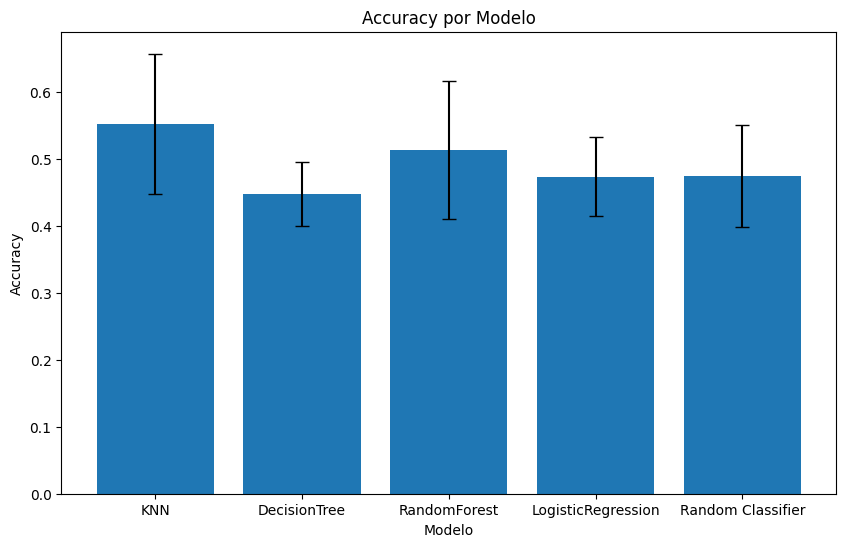

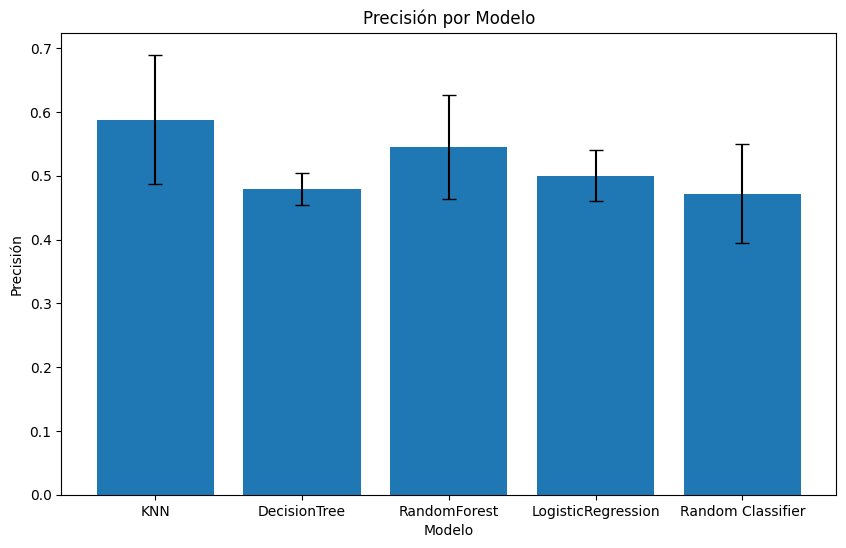

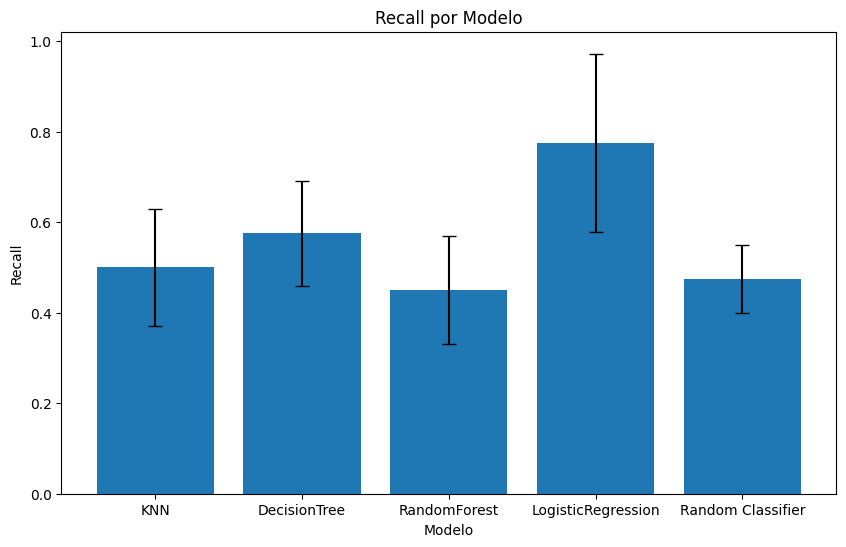

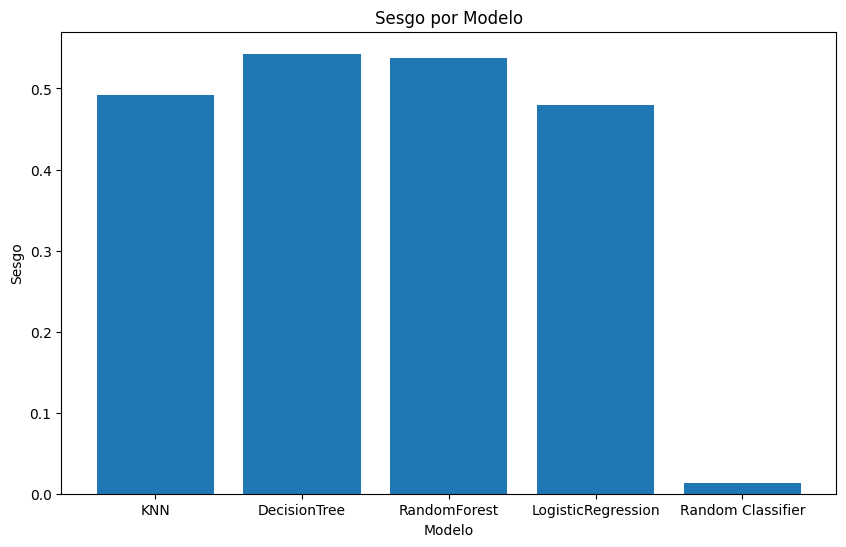

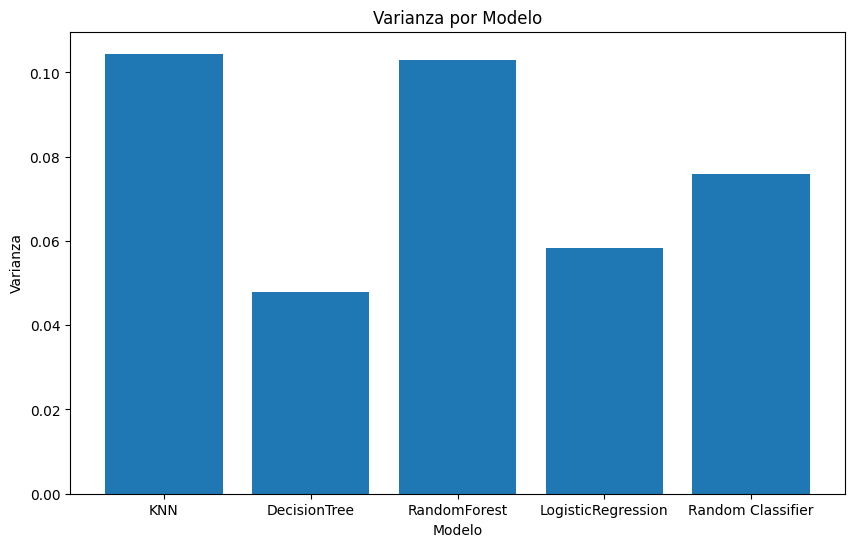

In [ ]:
# Datos de los modelos
modelos = ['Random', 'KNN', 'DecisionTree', 'RandomForest', 'LogisticRegression']
modelos = list(metrics.keys())
accuracy = [metrics[model]['Accuracy'] for model in modelos]
precision = [metrics[model]['Precision'] for model in modelos]
recall = [metrics[model]['Recall'] for model in modelos]
sesgo = [metrics[model]['Bias'] for model in modelos]
varianza = [metrics[model]['Variance'] for model in modelos]

# Desviaciones estándar
accuracy_std = [metrics[model]['CV_Accuracy_std'] for model in modelos]
precision_std = [metrics[model]['CV_Precision_std'] for model in modelos]
recall_std = [metrics[model]['CV_Recall_std'] for model in modelos]

# Gráfico de barras para Accuracy
plt.figure(figsize=(10, 6))
plt.bar(modelos, accuracy, yerr=accuracy_std, capsize=5)
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Accuracy por Modelo')
plt.show()

# Gráfico de barras para Precisión
plt.figure(figsize=(10, 6))
plt.bar(modelos, precision, yerr=precision_std, capsize=5)
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Precisión por Modelo')
plt.show()

# Gráfico de barras para Recall
plt.figure(figsize=(10, 6))
plt.bar(modelos, recall, yerr=recall_std, capsize=5)
plt.xlabel('Modelo')
plt.ylabel('Recall')
plt.title('Recall por Modelo')
plt.show()

# Gráfico de barras para Sesgo
plt.figure(figsize=(10, 6))
plt.bar(modelos, sesgo)
plt.xlabel('Modelo')
plt.ylabel('Sesgo')
plt.title('Sesgo por Modelo')
plt.show()

# Gráfico de barras para Varianza
plt.figure(figsize=(10, 6))
plt.bar(modelos, varianza)
plt.xlabel('Modelo')
plt.ylabel('Varianza')
plt.title('Varianza por Modelo')
plt.show()

In [ ]:
new_data = np.array([[0.5, -0.3],[1, -1],[180.089996, 179.138626]])

# Predicción con los nuevos datos
predictions = best_models['KNN'].predict(new_data)

# Imprimir las predicciones
print(f"Predicción para los nuevos datos: {predictions}")

Predicción para los nuevos datos: [0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Analisis:**

Desempeño de los Modelos:

KNN muestra un desempeño ligeramente superior a los otros modelos en términos de accuracy (0.55) y precisión (0.59), aunque su recall (0.50) es limitado. Esto indica que tiene una capacidad aceptable para clasificar correctamente, pero con cierta dificultad para identificar todos los casos positivos. La varianza de 0.10 sugiere cierta inestabilidad en su rendimiento entre los conjuntos de datos.

DecisionTree tiene un accuracy bajo de 0.45 y una precisión de 0.48, pero un recall algo mayor (0.57), lo que indica que este modelo prioriza capturar los casos positivos a pesar de clasificar incorrectamente muchos negativos. Sin embargo, su alta desviación estándar (0.05) en las métricas refleja menor variabilidad en comparación con otros modelos.

RandomForest ofrece un balance moderado con un accuracy de 0.51 y una precisión de 0.55, pero su recall (0.45) es menor, lo que indica que no es muy eficiente en identificar correctamente los casos positivos. Además, tiene problemas de varianza alta (0.10), lo que sugiere cambios en su rendimiento.

LogisticRegression logra el recall más alto (0.78), indicando que identifica la mayoría de los casos positivos. Sin embargo, su accuracy (0.47) y precisión (0.50) son bajas, lo que significa que a menudo clasifica erróneamente los negativos como positivos. Esto podría ser útil en casos donde se priorice identificar los casos positivos a costa de cometer más errores en los negativos.

El Random Classifier, como modelo de referencia, muestra un desempeño limitado con valores constantes en accuracy, precisión y recall (0.47) y un sesgo muy bajo (0.01). Este modelo demuestra que los demás enfoques superan el rendimiento de una clasificación completamente aleatoria, aunque con márgenes relativamente pequeños.

Sesgo y Varianza:

Los modelos como DecisionTree y RandomForest presentan sesgos altos (0.54), lo que indica que no capturan adecuadamente la complejidad de los datos, mientras que KNN y LogisticRegression tienen sesgos menores, lo que sugiere que capturan patrones algo más relevantes en los datos de entrenamiento.
Las varianzas más altas en KNN y RandomForest (0.10) sugieren que estos modelos pueden ser más sensibles a cambios en los datos de entrada, mientras que DecisionTree y LogisticRegression tienen una variabilidad más controlada.
Comparación General:

Si bien ningún modelo ofrece un desempeño ideal, KNN muestra el mejor balance entre las métricas evaluadas, lo que lo hace el modelo más competitivo para este problema en comparación con los demás. LogisticRegression es útil en casos donde el recall alto sea crítico, mientras que DecisionTree y RandomForest ofrecen alternativas con limitaciones en diferentes áreas.
Consideraciones Futuros:

Decision final:

Los resultados sugieren que podría ser necesario explorar técnicas adicionales como el ajuste de hiperparámetros, ingeniería de características o aumentar el tamaño del conjunto de datos para mejorar el desempeño de los modelos. Además, es importante abordar los problemas de sesgo y varianza para garantizar un modelo más robusto y confiable.
En resumen, el modelo KNN logra el mejor equilibrio general, aunque aún hay margen significativo para mejorar la capacidad de generalización y estabilidad de los modelos.